# Assignment for Week 12

## Final Project     

Week's 12 assignment will be work towards the final project. 

### About Final Project  

The final project will be a competition submission to any of the platforms available such as Kaggle. The competition will require to either build a Linear Regression or Logistic Regression model. 

The instructor will notify students by week 7 on the competition and the submissions.  This competition will include some or all the material and skills learned in the course.

Students are required to submit the final version of work/codes as a Jupyter Notebook via colab as submitted to the competition along with the link to their account pointing to their score on the competition's board. This will be evaluated and graded for the entire project for the duration of week 8-12. 



## Tasks

**Required:**    

*   Submit a version of your model to the comopetition.  

*   Provide a link of your competition's score.

# Uploading Data from Kaggle 

In [187]:
!pip install -q kaggle 

In [188]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"yosefassef","key":"9860d03f1146d09d10b6b2e37167b674"}'}

In [189]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [190]:
!cp kaggle.json ~/.kaggle/

In [191]:
! chmod 600 ~/.kaggle/kaggle.json

In [192]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              221KB  2021-03-28 09:42:48           1155  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            873  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            744  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            324  
alsgroup/end-als                                            End ALS Kaggle C

In [193]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


##loading,exploing and understanding data set


In [194]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs

In [224]:
train_data = pd.read_csv('train.csv')
train_data. head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [225]:
train_data.shape

(1460, 81)

In [226]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

undersung the destribusion of the data 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


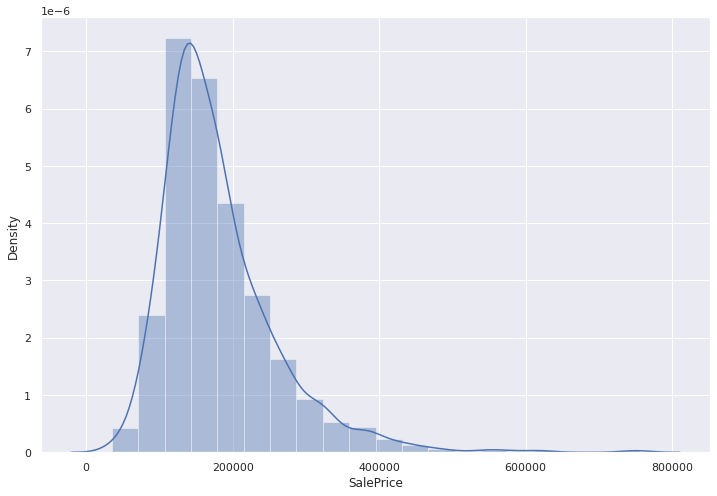

In [227]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(train_data['SalePrice'],bins =20);

In [228]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

##Correlation of Numeric Features

In [229]:
numeric = train_data.select_dtypes(include=[np.number])
corr = numeric.corr()
print(corr['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

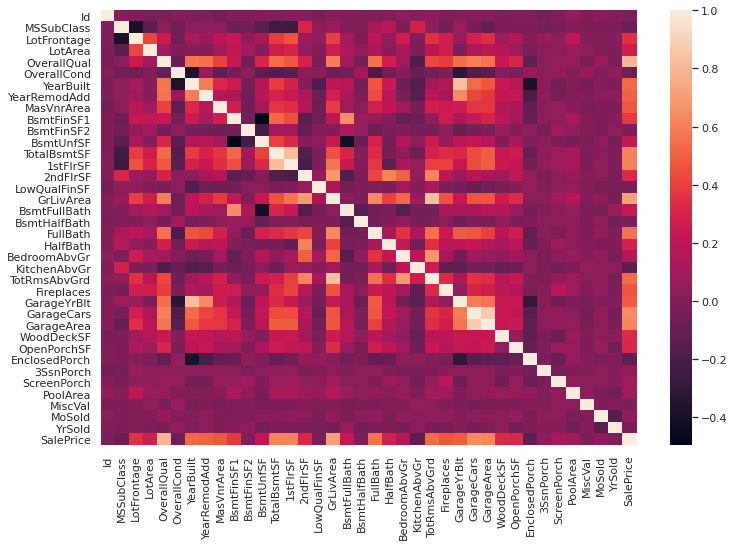

In [202]:
sns.heatmap(corr)

##Detecting outliers

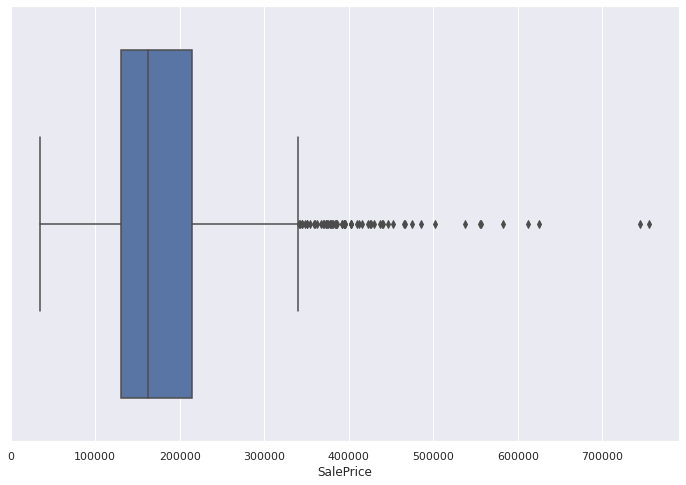

In [204]:
sns.boxplot(x =train_data ['SalePrice'])

##clean outlaier

In [206]:
print("Length of data before dropping outliers:", len(train_data))
train_data = train_data.drop(train_data[(test_data['GrLivArea']>4000) 
                                & (train_data['SalePrice']<300000)].index)
print("Length of data after dropping outliers:", len(train_data))
train_data = train_data.drop(train_data[(train_data['GrLivArea']>5000) 
                                | (train_data['SalePrice']>500000)].index)
print("Length of data after dropping outliers:", len(train_data))

Length of data before dropping outliers: 1460
Length of data after dropping outliers: 1459
Length of data after dropping outliers: 1449


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


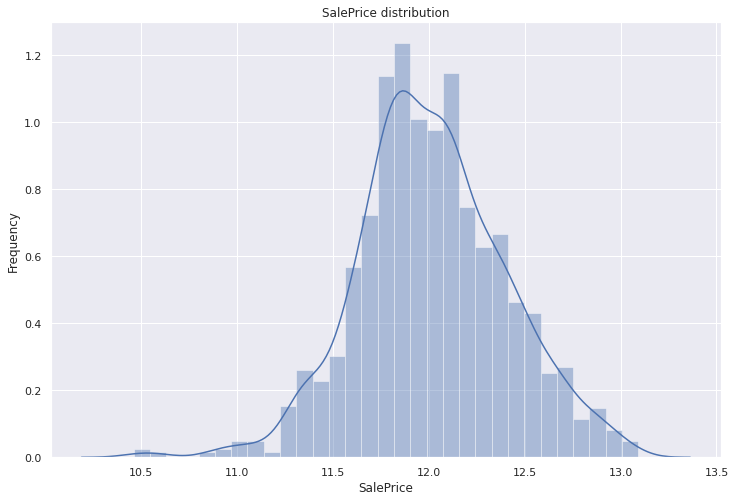

In [207]:
###normalzing the destrbustion
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

sns.distplot(train_data['SalePrice'])

plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

In [208]:
count_missing =(train_data.isnull().sum()/len(train_data)) * 100 
count_missing = count_missing[count_missing > 0]
print(count_missing)


LotFrontage     17.874396
Alley           93.788820
MasVnrType       0.552105
MasVnrArea       0.552105
BsmtQual         2.553485
BsmtCond         2.553485
BsmtExposure     2.622498
BsmtFinType1     2.553485
BsmtFinType2     2.622498
Electrical       0.069013
FireplaceQu     47.619048
GarageType       5.590062
GarageYrBlt      5.590062
GarageFinish     5.590062
GarageQual       5.590062
GarageCond       5.590062
PoolQC          99.654934
Fence           80.676329
MiscFeature     96.273292
dtype: float64


In [209]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [210]:
test_data.shape

(1459, 80)

In [211]:
count_missing =(test_data.isnull().sum()/len(test_data)) * 100 
count_missing = count_missing[count_missing > 0]
print(count_missing)


MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64


In [212]:
train_data.drop(['SalePrice'], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1449.0,729.438233,422.083420,1.0,364.0,728.0,1095.0,1460.0
MSSubClass,1449.0,56.915114,42.394739,20.0,20.0,50.0,70.0,190.0
LotFrontage,1190.0,69.656303,23.047222,21.0,59.0,69.0,80.0,313.0
LotArea,1449.0,10410.782609,9821.790197,1300.0,7535.0,9452.0,11500.0,215245.0
OverallQual,1449.0,6.075224,1.358623,1.0,5.0,6.0,7.0,10.0
OverallCond,1449.0,5.579020,1.115933,1.0,5.0,5.0,6.0,9.0
YearBuilt,1449.0,1971.022774,30.181773,1872.0,1954.0,1972.0,2000.0,2010.0
YearRemodAdd,1449.0,1984.719807,20.649740,1950.0,1966.0,1993.0,2004.0,2010.0
MasVnrArea,1441.0,100.113810,172.950180,0.0,0.0,0.0,162.0,1600.0
BsmtFinSF1,1449.0,433.801242,426.356408,0.0,0.0,380.0,704.0,2260.0


##Handlling Missing data

In [213]:
 train_data.drop(['Id', 'Alley','GarageYrBlt','PoolQC', 'Fence',	'MiscFeature'],axis =1, inplace= True )

In [214]:
 train_data['LotFrontage']= train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
 train_data['BsmtQual']= train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
 train_data['BsmtCond']= train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
 train_data['FireplaceQu']= train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
 train_data['GarageFinish']= train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
 train_data['GarageType']= train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
 train_data['GarageQual']= train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
 train_data['BsmtFinType2']= train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])
 train_data['BsmtExposure']= train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
 train_data['BsmtFinType1']= train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])
 train_data['MasVnrType']= train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
 train_data['MasVnrArea']= train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0])
 train_data['Electrical']= train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])
 train_data['GarageCond']= train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])

In [215]:
train_data.isnull().sum().sort_values(ascending = False)

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
MSSubClass      0
Length: 75, dtype: int64

In [216]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [217]:
test_data.drop([ 'Id','GarageYrBlt','Alley','PoolQC', 'Fence',	'MiscFeature'],axis =1, inplace= True )
test_data['LotFrontage']= test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['MSZoning']= test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['FireplaceQu']= test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])


In [218]:
test_data.isnull().sum().sort_values(ascending = False)

GarageCond      78
GarageFinish    78
GarageQual      78
GarageType      76
BsmtCond        45
                ..
1stFlrSF         0
Electrical       0
CentralAir       0
HeatingQC        0
MSSubClass       0
Length: 74, dtype: int64

In [219]:
test_data['GarageQual']= test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageFinish']= test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageCond']= test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['GarageType']= test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['BsmtFinType2']= test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['BsmtFinType1']= test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtQual']= test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['BsmtExposure']= test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtCond']= test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['MasVnrType']= test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['Functional']= test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['BsmtFullBath']= test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0])
test_data['BsmtHalfBath']= test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mode()[0])
test_data['Utilities']= test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['GarageArea']= test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['TotalBsmtSF']= test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['GarageCars']= test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['SaleType']= test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])
test_data['BsmtFinSF1']= test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['Exterior2nd']= test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['BsmtFinSF2']= test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['KitchenQual']= test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Exterior1st']= test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['BsmtUnfSF']= test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['MasVnrArea']= test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])

In [220]:
test_data.isnull().sum().sort_values(ascending = False)

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
MSSubClass       0
Length: 74, dtype: int64

In [221]:
final_df=pd.concat([train_data,test_data],axis=0)
 

In [222]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2908 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2908 non-null   int64  
 1   MSZoning       2908 non-null   object 
 2   LotFrontage    2908 non-null   float64
 3   LotArea        2908 non-null   int64  
 4   Street         2908 non-null   object 
 5   LotShape       2908 non-null   object 
 6   LandContour    2908 non-null   object 
 7   Utilities      2908 non-null   object 
 8   LotConfig      2908 non-null   object 
 9   LandSlope      2908 non-null   object 
 10  Neighborhood   2908 non-null   object 
 11  Condition1     2908 non-null   object 
 12  Condition2     2908 non-null   object 
 13  BldgType       2908 non-null   object 
 14  HouseStyle     2908 non-null   object 
 15  OverallQual    2908 non-null   int64  
 16  OverallCond    2908 non-null   int64  
 17  YearBuilt      2908 non-null   int64  
 18  YearRemo

In [223]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2908 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2908 non-null   int64  
 1   MSZoning       2908 non-null   object 
 2   LotFrontage    2908 non-null   float64
 3   LotArea        2908 non-null   int64  
 4   Street         2908 non-null   object 
 5   LotShape       2908 non-null   object 
 6   LandContour    2908 non-null   object 
 7   Utilities      2908 non-null   object 
 8   LotConfig      2908 non-null   object 
 9   LandSlope      2908 non-null   object 
 10  Neighborhood   2908 non-null   object 
 11  Condition1     2908 non-null   object 
 12  Condition2     2908 non-null   object 
 13  BldgType       2908 non-null   object 
 14  HouseStyle     2908 non-null   object 
 15  OverallQual    2908 non-null   int64  
 16  OverallCond    2908 non-null   int64  
 17  YearBuilt      2908 non-null   int64  
 18  YearRemo

#Handling categorical data

In [38]:
final_df['OverallQual']= final_df['OverallQual'].astype(str)
final_df['OverallCond']= final_df['OverallCond'].astype(str)
final_df['YrSold']= final_df['YrSold'].astype(str)
final_df['MoSold']= final_df['MoSold'].astype(str)
final_df['MSSubClass']= final_df['MSSubClass'].astype(str)
final_df['YearRemodAdd']= final_df['YearRemodAdd'].astype(str)
final_df['YearBuilt']= final_df['YearBuilt'].astype(str)

In [39]:
cat_cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual',
        'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2',
        'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape',
        'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')


In [40]:


import numpy as np                                                    
import pandas as pd                                                   
import seaborn as sns                                                 
from scipy import stats                                               
import matplotlib.pyplot as plt                                       
from scipy.stats import norm, skew                                    
from scipy.special import boxcox1p                                    
from sklearn.pipeline import make_pipeline                           
from sklearn.kernel_ridge import KernelRidge                         
from sklearn.linear_model import Lasso, ElasticNet                   
from sklearn.preprocessing import LabelEncoder, RobustScaler          
from sklearn.model_selection import RepeatedKFold, cross_val_score    

In [41]:
for col in cat_cols:
    lbl = LabelEncoder()  # to convert str data -> numerical
    col_values = list(final_df[col].values)
    final_df[col] = lbl.fit(col_values).transform(col_values)

In [42]:
final_df['TotalSF'] = final_df['TotalBsmtSF'] + final_df['1stFlrSF'] + final_df['2ndFlrSF']
numeric_feats = final_df.dtypes[final_df.dtypes != "object"].index
skewed_data_ratio = final_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewness' : skewed_data_ratio})


In [43]:
skeweness_anomaly_ratio = 0.6
skewness = skewness[abs(skewness) > skeweness_anomaly_ratio]

skewed_features = skewness.index
lambda_ = 0.15
for feature in skewed_features:
    final_df[feature] = boxcox1p(final_df[feature], lambda_)

In [44]:
final_df = pd.get_dummies(final_df).reset_index(drop=True)
trina = final_df.iloc[:1460]
test = final_df.iloc[1460:]

In [45]:
trina.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,...,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,1.540963,0.0,1.820334,8.059126,1.194318,1.820334,1.194318,1.540963,1.540963,1.194318,11.170327,2.055642,0.0,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.194318,0.730463,1.194318,10.506271,1.820334,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,1.540963,0.0,2.440268,0.000000,1.540963,1.820334,1.194318,1.540963,0.730463,0.000000,12.062832,2.055642,0.0,8.897844,12.792276,0.000000,0.730463,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,1.820334,0.730463,1.194318,10.062098,1.820334,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.000000,0.0,1.820334,7.646538,1.194318,1.820334,1.194318,1.540963,1.194318,1.194318,10.200343,2.055642,0.0,9.917060,11.892039,0.000000,0.730463,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.730463,1.820334,0.730463,1.194318,10.775536,1.820334,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.000000,0.0,1.820334,0.000000,1.540963,1.820334,1.540963,0.730463,1.540963,0.000000,8.274266,2.055642,0.0,10.468500,11.354094,1.194318,0.730463,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,1.194318,1.194318,1.540963,10.918253,1.820334,...,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.000000,0.0,1.820334,9.391827,1.194318,1.820334,1.194318,1.540963,0.000000,1.194318,10.971129,2.055642,0.0,10.221051,12.510588,0.000000,0.730463,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,1.194318,2.750250,2.259674,0.730463,1.820334,0.730463,1.540963,11.627708,1.820334,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [46]:
test.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,...,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,2.055642,6.221214,20.479373,0.730463,1.540963,0.0,2.055642,0.000000,1.540963,1.820334,1.540963,1.540963,1.540963,1.820334,10.105326,1.540963,7.397498,8.780689,11.775114,1.820334,0.730463,11.818680,0.000000,0.0,11.818680,0.0,0.0,0.730463,0.000000,1.194318,0.730463,1.540963,2.055642,2.259674,0.000000,1.194318,1.194318,0.730463,11.259868,1.820334,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1461,2.055642,6.244956,21.327220,0.730463,0.000000,0.0,2.055642,6.808145,1.540963,1.820334,1.540963,1.540963,1.540963,0.000000,11.901094,2.055642,0.000000,9.752379,12.943735,1.820334,0.730463,12.943735,0.000000,0.0,12.943735,0.0,0.0,0.730463,0.730463,1.540963,0.730463,1.194318,2.259674,2.259674,0.000000,1.194318,1.194318,0.730463,9.118181,1.820334,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,2.885846,6.073289,21.196905,0.730463,0.000000,0.0,1.820334,0.000000,1.540963,1.820334,1.194318,1.540963,1.540963,1.194318,11.476685,2.055642,0.000000,7.293500,11.916131,1.194318,0.730463,11.916131,11.151348,0.0,13.551272,0.0,0.0,1.194318,0.730463,1.540963,0.730463,1.540963,2.259674,2.259674,0.730463,1.820334,0.000000,1.194318,10.179489,1.820334,...,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1463,2.885846,6.172972,19.865444,0.730463,0.000000,0.0,2.055642,3.858807,1.540963,1.820334,1.540963,1.540963,1.540963,1.194318,10.749651,2.055642,0.000000,9.207511,11.910125,0.000000,0.730463,11.910125,11.062536,0.0,13.504453,0.0,0.0,1.194318,0.730463,1.540963,0.730463,1.194318,2.440268,2.259674,0.730463,1.194318,0.000000,1.194318,10.116035,1.820334,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1464,0.000000,5.093857,17.257255,0.730463,0.000000,0.0,1.820334,0.000000,1.194318,1.820334,1.194318,1.540963,1.540963,0.000000,8.720170,2.055642,0.000000,12.172900,12.833625,0.000000,0.730463,12.833625,0.000000,0.0,12.833625,0.0,0.0,1.194318,0.000000,1.194318,0.730463,1.194318,2.055642,2.259674,0.000000,1.194318,0.730463,1.194318,10.302477,1.820334,...,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [47]:
x = train_data.drop('SalePrice',axis=1)
y = train_data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,shuffle=True,random_state=20)



Text(0, 0.5, 'Predictions')

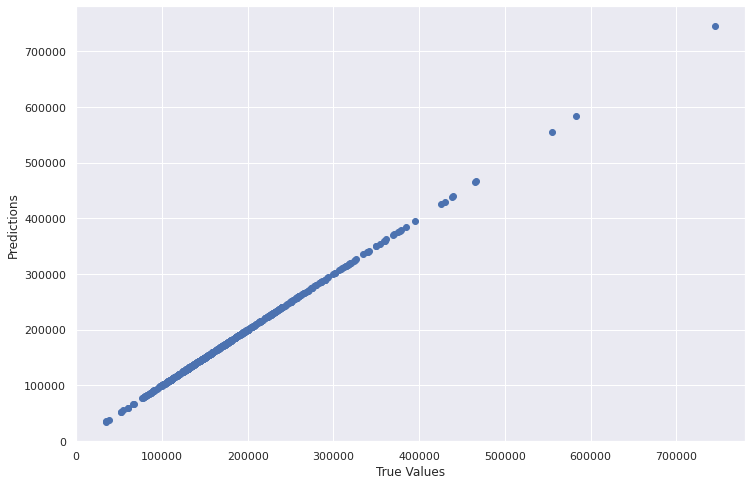

In [148]:
plt.scatter(y_test, y_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [230]:
print(x_train.shape)
print(y_train.shape)

(876, 74)
(876,)


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
clf_linear = LinearRegression()
clf_linear.fit(x_train, y_train)
score = clf_linear.score(x_test, y_test)
print(score)